
**STEP 1 - Data Loading and Inspection**

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [3]:
df = pd.read_csv('/content/stock_dataset.csv') # data_importing
df.head(20) # fetching first 20 rows of dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.9800,717.3100,719.00,1214517,718.92,722.9800,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.6500,703.2600,714.91,1982471,710.36,716.6500,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.8200,688.4515,708.65,3402357,691.72,708.8200,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,698.77,2082538,693.71,702.4800,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.7700,692.0100,698.40,1465634,695.94,702.7700,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.8600,693.0819,699.06,1184318,697.46,700.8600,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.9500,687.0000,697.45,2171415,701.87,701.9500,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.4000,673.4500,675.17,4449022,675.22,689.4000,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.3000,663.2840,671.00,2641085,668.26,672.3000,663.2840,671.00,2641085,0.0,1.0


In [4]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [5]:
# statistical description of data
df.describe()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [6]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
# checking null values
df.isnull().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


**STEP 2 - Data Preprocessing**

In [8]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(20)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


**STEP 3 - Data Visualization**

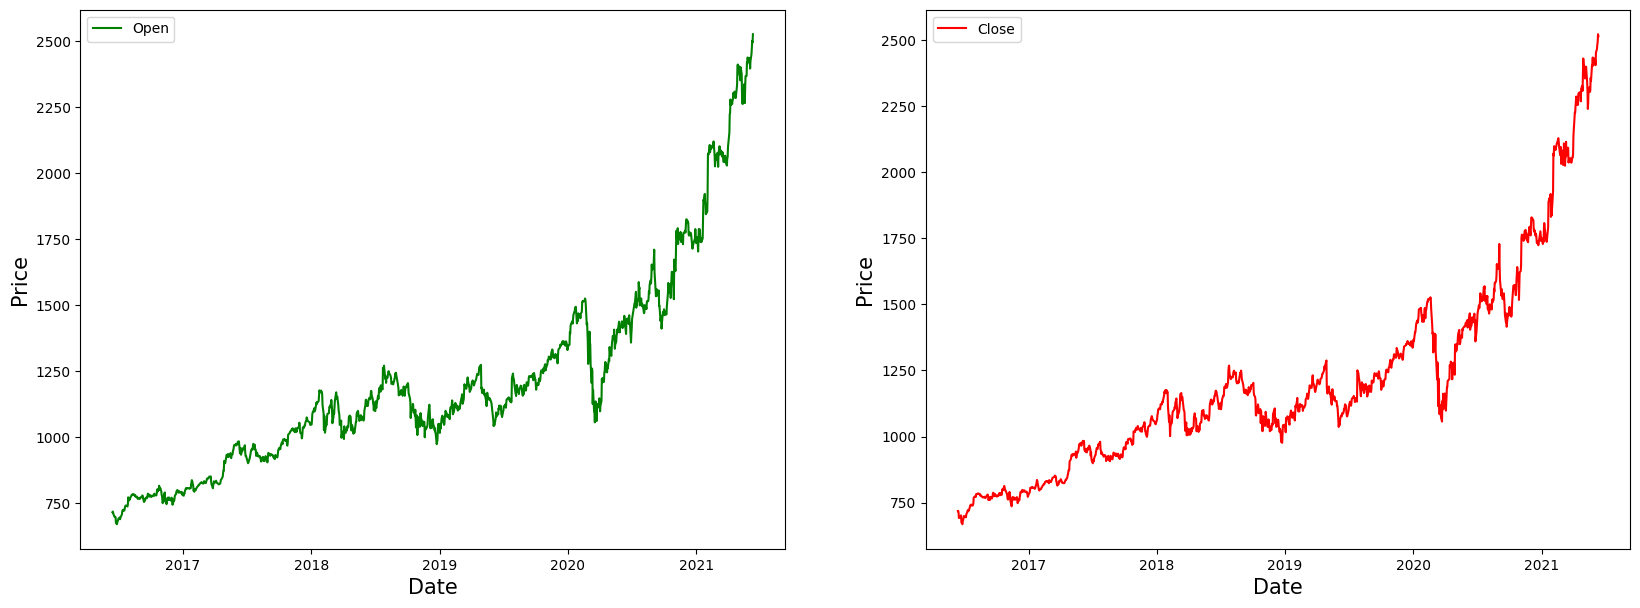

In [9]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [10]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(20)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


**STEP 4 - Data Splitting and Sequencing**

In [11]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [12]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [13]:
train_data.head()


,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732


In [14]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [15]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## Model Building and Training

## vanila LSTM Implementation

In [16]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=20,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0171 - mean_absolute_error: 0.0979 - val_loss: 0.0139 - val_mean_absolute_error: 0.0941
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 8.1261e-04 - mean_absolute_error: 0.0231 - val_loss: 0.0055 - val_mean_absolute_error: 0.0592
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.0779e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0034 - val_mean_absolute_error: 0.0448
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 4.8498e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0046 - val_mean_absolute_error: 0.0538
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.4254e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0033 - val_mean_absolute_error: 0.0442
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 5.0752e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0029 - val_mean_absolute_error: 0.0409
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1410e-04 - mean_absolute_

In [18]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


array([[0.37826702, 0.3816278 ],
       [0.3811379 , 0.38434735],
       [0.38342696, 0.38661006],
       [0.3857873 , 0.38895008],
       [0.38806355, 0.39122218]], dtype=float32)

In [19]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1372.2767, 1375.5461],
       [1377.5992, 1380.5863],
       [1381.8429, 1384.7799],
       [1386.2189, 1389.1167],
       [1390.4388, 1393.3278]], dtype=float32)

In [20]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [21]:
# Inversing normalization/scaling
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1372.276733,1375.546143
2020-05-28,1396.86,1416.73,1377.599243,1380.586304
2020-05-29,1416.94,1428.92,1381.842896,1384.779907
2020-06-01,1418.39,1431.82,1386.218872,1389.116699
2020-06-02,1430.55,1439.22,1390.438843,1393.327759


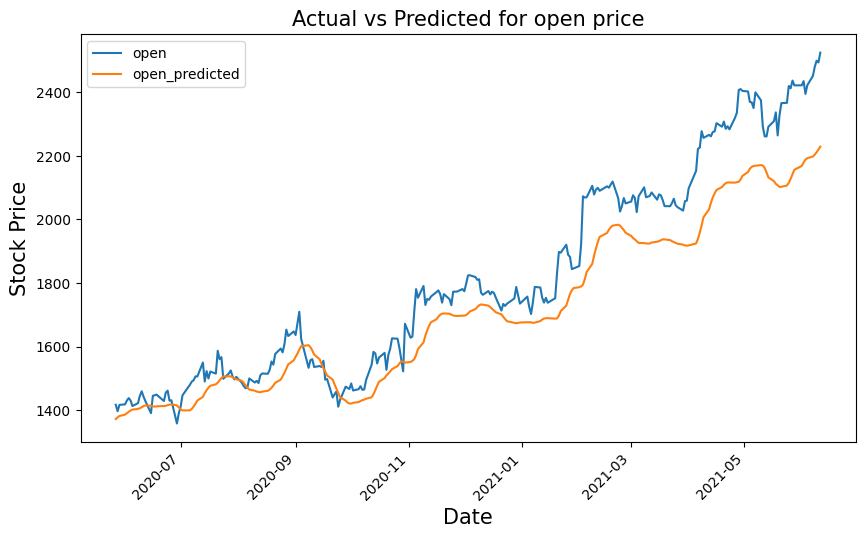

In [22]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

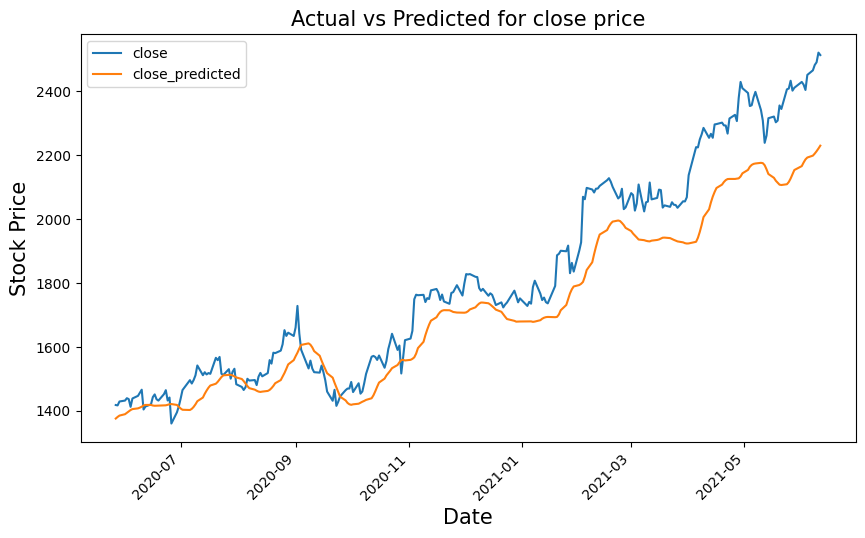

In [23]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

STEP 7 - Upcoming Price Prediction

In [24]:
# Creating a new DataFrame to append 10 days of empty data
new_data = pd.DataFrame(index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D'))

# Appending the new_data to df_merge
df_merge = pd.concat([df_merge, new_data])

# Now you can select the specific date range
selected_date_range = df_merge['2021-06-09':'2021-06-28']
print(selected_date_range)

               open    close  open_predicted  close_predicted
2021-06-09  2499.50  2491.40     2211.469238      2212.852539
2021-06-10  2494.01  2521.60     2219.928711      2221.162842
2021-06-11  2524.92  2513.93     2229.267578      2230.185303
2021-06-11      NaN      NaN             NaN              NaN
2021-06-12      NaN      NaN             NaN              NaN
2021-06-13      NaN      NaN             NaN              NaN
2021-06-14      NaN      NaN             NaN              NaN
2021-06-15      NaN      NaN             NaN              NaN
2021-06-16      NaN      NaN             NaN              NaN
2021-06-17      NaN      NaN             NaN              NaN
2021-06-18      NaN      NaN             NaN              NaN
2021-06-19      NaN      NaN             NaN              NaN
2021-06-20      NaN      NaN             NaN              NaN
2021-06-21      NaN      NaN             NaN              NaN


In [25]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [26]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = MMS  # Assign MMS to scaler

# Assuming 'test_label' contains the true values for the test set
# and 'test_predicted' contains the model's predictions
# You might need to adjust these variable names if they are different in your code

# Real prices (inverse transformed y_test)
# Reshape test_label to have the same shape as the scaler expects
real_prices = scaler.inverse_transform(test_label.reshape(-1, scaler.n_features_in_))

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(test_predicted)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 17130.546506094313
Root Mean Squared Error (RMSE): 130.88371367780758
Mean Absolute Error (MAE): 104.79254787153769
R-squared (R2): 0.8403116070462097


## Bidirectional LSTM Implementation

In [31]:

# Bidirectional LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']].values)

In [33]:
# Create sequences
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Past 50 days
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [34]:
# Reshape the data for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [35]:
# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [36]:
# Define the Bidirectional LSTM model
bidirectional_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)  # Output layer for regression
])

In [37]:

# Compile the model
bidirectional_model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Train the model
bidirectional_history = bidirectional_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0165 - val_loss: 0.0102
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 9.9541e-04 - val_loss: 0.0033
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.9521e-04 - val_loss: 0.0030
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 5.3737e-04 - val_loss: 0.0013
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 4.5780e-04 - val_loss: 9.3885e-04
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 3.7648e-04 - val_loss: 0.0012
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 3.2096e-04 - val_loss: 8.8472e-04
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 2.6996e-04 - val_loss: 0.0010
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 3.0856e-04 - val_loss: 0.0013
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2.6615e-04 - val_loss: 0.0016
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 2.1629e-04 - val_loss: 0.0021
Epoch 12/20


In [39]:

# Make predictions
predicted_prices = bidirectional_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [40]:

# Rescale the predictions back to the original scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)

In [41]:
# Evaluate the model
import matplotlib.pyplot as plt

In [42]:

# Prepare data for visualization
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

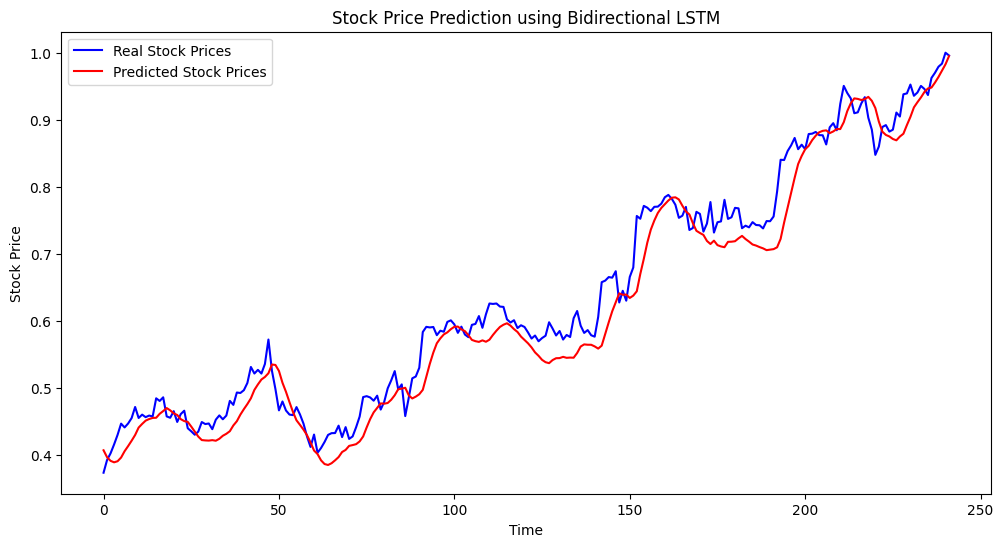

In [43]:
# Plot the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Real Stock Prices')
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Stock Prices')
plt.title('Stock Price Prediction using Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [44]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.37826702, 0.3816278 ],
       [0.3811379 , 0.38434735],
       [0.38342696, 0.38661006],
       [0.3857873 , 0.38895008],
       [0.38806355, 0.39122218]], dtype=float32)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Real prices (inverse transformed y_test)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.0012269417346892162
Root Mean Squared Error (RMSE): 0.03502772808346576
Mean Absolute Error (MAE): 0.02775311976466647
R-squared (R2): 0.9589872482990858


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = MMS  # Assign MMS to scaler

# Assuming 'test_label' contains the true values for the test set
# and 'test_predicted' contains the model's predictions
# You might need to adjust these variable names if they are different in your code

# Real prices (inverse transformed y_test)
# Reshape test_label to have the same shape as the scaler expects
real_prices = scaler.inverse_transform(test_label.reshape(-1, scaler.n_features_in_))

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(test_predicted)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 17130.546506094313
Root Mean Squared Error (RMSE): 130.88371367780758
Mean Absolute Error (MAE): 104.79254787153769
R-squared (R2): 0.8403116070462097


##Stacked LSTM model

In [48]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [49]:

scaled_data = MMS.fit_transform(df[['close']].values)

In [50]:
# Create sequences
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Past 50 days
    y.append(scaled_data[i, 0])                   # Target is the next day's value

X, y = np.array(X), np.array(y)

In [51]:
# Reshape the data for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [52]:

# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [53]:
# Define the Stacked LSTM model
stacked_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)  # Output layer for regression
])

In [54]:

# Compile the model
stacked_model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
# Train the model
stacked_history = stacked_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0160 - val_loss: 0.0431
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 7.1543e-04 - val_loss: 0.0025
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 7.6655e-04 - val_loss: 0.0069
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 6.4974e-04 - val_loss: 0.0048
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 5.8979e-04 - val_loss: 0.0093
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 6.4721e-04 - val_loss: 0.0046
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 5.5678e-04 - val_loss: 0.0031
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 6.0142e-04 - val_loss: 0.0050
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 4.6150e-04 - val_loss: 0.0137
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 4.3455e-04 - val_loss: 0.0095
Epoch 12/20
31/31 ━━━━━

In [56]:
# Make predictions
predicted_prices = stacked_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [57]:
# Rescale the predictions back to the original scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)

In [58]:
# Evaluate the model
import matplotlib.pyplot as plt

# Prepare data for visualization
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

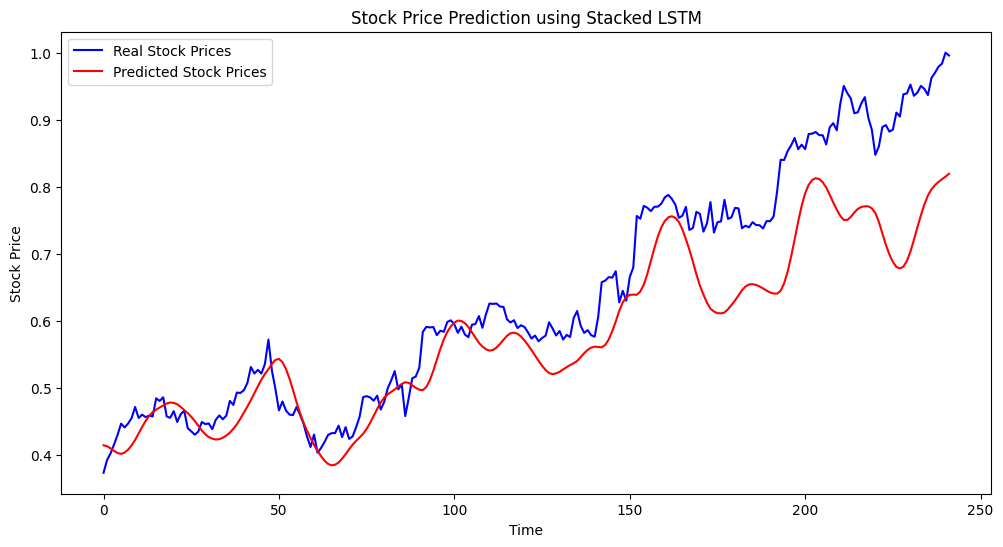

In [59]:
# Plot the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Real Stock Prices')
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Stock Prices')
plt.title('Stock Price Prediction using Stacked LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [60]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Real prices (inverse transformed y_test)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.008034567480552512
Root Mean Squared Error (RMSE): 0.08963574889826331
Mean Absolute Error (MAE): 0.06666494960637986
R-squared (R2): 0.7314300167745073


In [64]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = MMS  # Assign MMS to scaler

# Assuming 'test_label' contains the true values for the test set
# and 'test_predicted' contains the model's predictions
# You might need to adjust these variable names if they are different in your code

# Real prices (inverse transformed y_test)
# Reshape test_label to have the same shape as the scaler expects

# Reshape test_label to have 2 features (open and close)
real_prices = scaler.inverse_transform(test_label)

# predicted_prices is already in the correct shape (264, 2) and scaled
# predicted_prices = scaler.inverse_transform(test_predicted)

# Calculate metrics for both open and close prices separately
mse_open = mean_squared_error(real_prices[:, 0], predicted_prices[:, 0])  # Open price
mse_close = mean_squared_error(real_prices[:, 1], predicted_prices[:, 1]) # Close price

rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.008034567480552512
Root Mean Squared Error (RMSE): 0.08963574889826331
Mean Absolute Error (MAE): 0.05653370575324476
R-squared (R2): 0.8403116237739326


##CNN-LSTM model

In [65]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense

In [66]:
# Normalize the data
scaled_data = MMS.fit_transform(df[['close']].values)

In [67]:
# Create sequences
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Past 50 days
    y.append(scaled_data[i, 0])                   # Target is the next day's value

X, y = np.array(X), np.array(y)

In [68]:
# Reshape the data for CNN-LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [69]:
# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [70]:
# Define the CNN-LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    #Flatten(),
    LSTM(50, return_sequences=False),
    Dense(1)  # Output layer for regression
])

In [71]:
# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [72]:
# Train the model
cnn_lstm_history = cnn_lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0227 - val_loss: 0.0261
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.2266e-04 - val_loss: 0.0017
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.4847e-04 - val_loss: 0.0018
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1352e-04 - val_loss: 0.0026
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3682e-04 - val_loss: 0.0021
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0961e-04 - val_loss: 0.0024
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3293e-04 - val_loss: 0.0042
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8513e-04 - val_loss: 0.0031
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.7426e-04 - val_loss: 0.0022
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.5789e-04 - val_loss: 0.0029
Epoch 12/20
31/31 ━━━━━━━━━

In [73]:
# Make predictions
predicted_prices = cnn_lstm_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [74]:
# Rescale the predictions back to the original scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)

In [75]:
# Evaluate the model
import matplotlib.pyplot as plt

# Prepare data for visualization
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

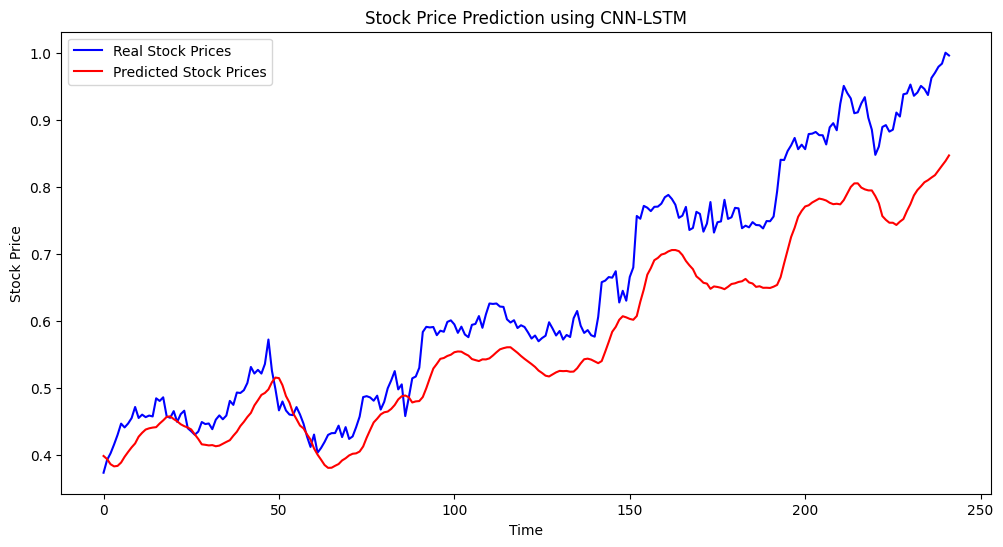

In [76]:
# Plot the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Real Stock Prices')
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Stock Prices')
plt.title('Stock Price Prediction using CNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Real prices (inverse transformed y_test)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.00661608590989728
Root Mean Squared Error (RMSE): 0.08133932572807129
Mean Absolute Error (MAE): 0.06840844488934392
R-squared (R2): 0.7788453347189586


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = MMS  # Assign MMS to scaler

# Assuming 'test_label' contains the true values for the test set
# and 'test_predicted' contains the model's predictions
# You might need to adjust these variable names if they are different in your code

# Real prices (inverse transformed y_test)
# Reshape test_label to have the same shape as the scaler expects
# real_prices = scaler.inverse_transform(test_label.reshape(-1, scaler.n_features_in_))
# The above line is causing the issue as it changes the number of samples.
# Instead, directly inverse transform test_label:
real_prices = scaler.inverse_transform(test_label)

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(test_predicted)

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.004985690225140007
Root Mean Squared Error (RMSE): 0.07060942022945668
Mean Absolute Error (MAE): 0.05653370575324476
R-squared (R2): 0.8403116237739326


##ConvLSTM Model


In [80]:
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential


In [81]:
# Reshape your data for ConvLSTM (samples, timesteps, rows, cols, channels)
# Assuming data has 1 feature (channel)
X_train_conv = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1, X_train.shape[2]))
X_test_conv = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1, X_test.shape[2]))

In [82]:
# ConvLSTM Model
model_conv_lstm = Sequential([
    ConvLSTM2D(filters=32, kernel_size=(1, 1), activation='relu',
               input_shape=(X_train_conv.shape[1], X_train_conv.shape[2], X_train_conv.shape[3], X_train_conv.shape[4])),
    BatchNormalization(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

In [83]:
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Compile the model
model_conv_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [84]:
# Train the model
history_conv = model_conv_lstm.fit(X_train_conv, y_train, epochs=20, batch_size=32, validation_data=(X_test_conv, y_test), verbose=1)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0121 - val_loss: 0.1701
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.7560e-04 - val_loss: 0.1736
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.4266e-04 - val_loss: 0.1848
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.4282e-04 - val_loss: 0.1862
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.1659e-04 - val_loss: 0.1714
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.3359e-04 - val_loss: 0.1690
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.0065e-04 - val_loss: 0.1654
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.1021e-04 - val_loss: 0.1551
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.7173e-04 - val_loss: 0.1505
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.7966e-04 - val_loss: 0.1269
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.2314e-04 - val_loss: 0.1238
Epoch 12/20
31/31 ━━━━━

In [85]:
# Evaluate and Predict
loss_conv = model_conv_lstm.evaluate(X_test_conv, y_test)
print(f"Test Loss for ConvLSTM: {loss_conv}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0190
Test Loss for ConvLSTM: 0.02969219908118248


In [86]:

predicted_conv = model_conv_lstm.predict(X_test_conv)
predicted_inverse_conv = scaler.inverse_transform(predicted_conv)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [90]:
# Metrics for ConvLSTM
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)) # Define y_test_inverse
mse_conv = mean_squared_error(y_test_inverse, predicted_inverse_conv)
mae_conv = mean_absolute_error(y_test_inverse, predicted_inverse_conv)
print(f"ConvLSTM MSE: {mse_conv}, MAE: {mae_conv}")

ConvLSTM MSE: 0.029692196460357596, MAE: 0.16150188043828517


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = MMS  # Assign MMS to scaler

# Assuming 'test_label' contains the true values for the test set
# and 'test_predicted' contains the model's predictions
# You might need to adjust these variable names if they are different in your code

# Real prices (inverse transformed y_test)
# Reshape test_label to have the same shape as the scaler expects
# real_prices = scaler.inverse_transform(test_label.reshape(-1, scaler.n_features_in_))
# The above line is causing the issue as it changes the number of samples.
# Instead, directly inverse transform test_label:
real_prices = scaler.inverse_transform(test_label)  # real_prices now has 264 samples

# Predicted prices (inverse transformed predictions from the model)
predicted_prices = scaler.inverse_transform(test_predicted)  # predicted_prices has 264 samples

# Metrics calculation
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.004985690225140007
Root Mean Squared Error (RMSE): 0.07060942022945668
Mean Absolute Error (MAE): 0.05653370575324476
R-squared (R2): 0.8403116237739326
